# Problem Description:
A Human Resource company needs to determine the salary for a new job position being created. They only have access to a salary dataset for the company, which includes salary information for the top 10 positions along with their corresponding levels. The task is to assist HR in deciding the appropriate salary if the new position falls between levels 7 and 8.

Data Set: **Position_Salaries.csv**
Rules: You are restricted from utilizing the sklearn library.You are limited to using only the libraries provided.

Reference : https://www.javatpoint.com/machine-learning-polynomial-regression

 https://www.kaggle.com/code/omkarsantoshraut/polynomial-regression

In [2]:
# Allowded to use only these libraries

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

## Exploratory data analysis

In [3]:
 df = pd.read_csv('/content/Position_Salaries.csv')
 df

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000
5,Region Manager,6,150000
6,Partner,7,200000
7,Senior Partner,8,300000
8,C-level,9,500000
9,CEO,10,1000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Position  10 non-null     object
 1   Level     10 non-null     int64 
 2   Salary    10 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 368.0+ bytes


In [8]:
df.describe()

,Level,Salary
count,10.00000,10.000000
mean,5.50000,249500.000000
std,3.02765,299373.883668
min,1.00000,45000.000000
25%,3.25000,65000.000000
50%,5.50000,130000.000000
75%,7.75000,275000.000000
max,10.00000,1000000.000000


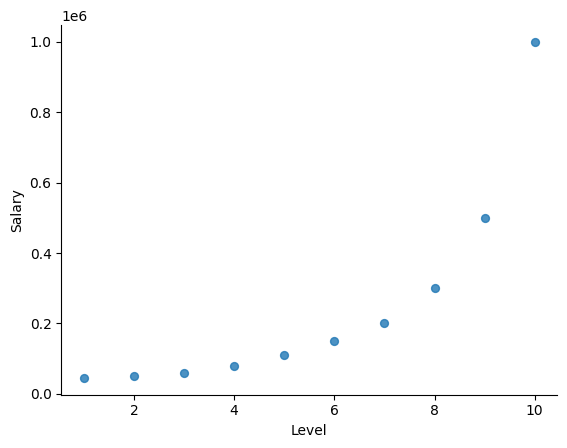

In [5]:


from matplotlib import pyplot as plt
df.plot(kind='scatter', x='Level', y='Salary', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

### Based on the exploratory data analysis, answer the following


* Can you use a simple linear regression model to fit this data (Yes/No)?
> * No
* If you use a simple linear model to fit this data, will it fit well (Yes/No)?
> * NO
* Explain why you said yes or no to the above questions.
> * By the above graph we can see that it is not forming any linear relationship . so a simple linear model does fit well to this data



## Polynomial Regression

**Construct a second order Model:** $$\;\;\;\;
\hat y = w_1 x_1^2 + w_2x_1 + b
$$

**Construct a Cost function:**
$$MSE(w_1,w_2,b)= your\;answer$$

In [17]:
X = df['Level'].values.reshape(-1, 1)
y = df['Salary'].values
X_poly = np.hstack((X, X**2))
X_poly = np.hstack((np.ones((X_poly.shape[0], 1)), X_poly))
coefficients = np.linalg.inv(X_poly.T.dot(X_poly)).dot(X_poly.T).dot(y)

def poly_model(x):
    return coefficients[0] + coefficients[1] * x + coefficients[2] * x**2

level_new=9.5
predicted_salary = poly_model(level_new)
print(f"Predicted Salary for level {level_new}: ${predicted_salary:.2f}")



Predicted Salary for level 9.5: $723611.74


### By analysing the cost function, answer the following


* Can you use mean squared error as the cost function (Yes/No)?
> * Yes
* Explain why you said yes or no to the above questions.
> * Mean squared error measures the average difference betweeen predicted and actual values.So it is suitable for polynomial model

**Derivatives of cost function:**
$$The partial derivatives of the Mean Squared Error (MSE) with respect to the parameters \(w_1\), \(w_2\), and \(b\) are given by:

- Derivative with respect to \(w_1\) (weight of \(x^2\)):
  $$
  \frac{\partial MSE}{\partial w_1} = -\frac{2}{n} \sum_{i=1}^n \left(y_i - (w_1 x_{1i}^2 + w_2 x_{1i} + b)\right) x_{1i}^2
  $$

- Derivative with respect to \(w_2\) (weight of \(x\)):
  $$
  \frac{\partial MSE}{\partial w_2} = -\frac{2}{n} \sum_{i=1}^n \left(y_i - (w_1 x_{1i}^2 + w_2 x_{1i} + b)\right) x_{1i}
  $$

- Derivative with respect to \(b\) (bias):
  $$
  \frac{\partial MSE}{\partial b} = -\frac{2}{n} \sum_{i=1}^n \left(y_i - (w_1 x_{1i}^2 + w_2 x_{1i} + b)\right)
  $$

**Gradient Descent Algorithm:**
```

```
$$Δw_1 = -\frac{2}{n} \sum_{i=1}^n \left( y_i - (w_1 x_{1i}^2 + w_2 x_{1i} + b) \right) x_{1i}^2 \
       $$ $$Δw_2 = -\frac{2}{n} \sum_{i=1}^n \left( y_i - (w_1 x_{1i}^2 + w_2 x_{1i} + b) \right) x_{1i}$$
       $$ Δb = -\frac{2}{n} \sum_{i=1}^n \left( y_i - (w_1 x_{1i}^2 + w_2 x_{1i} + b) \right)$$

## Implementation of the model

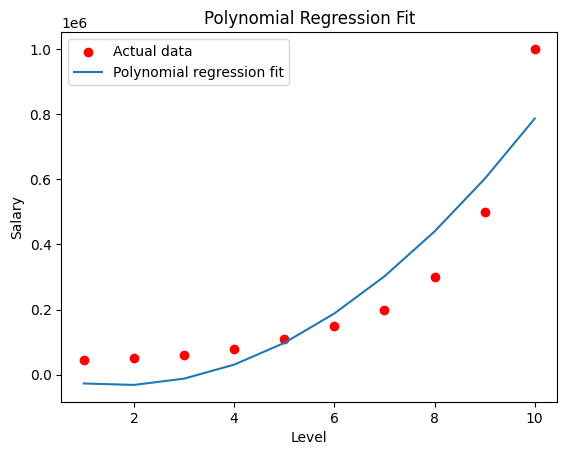

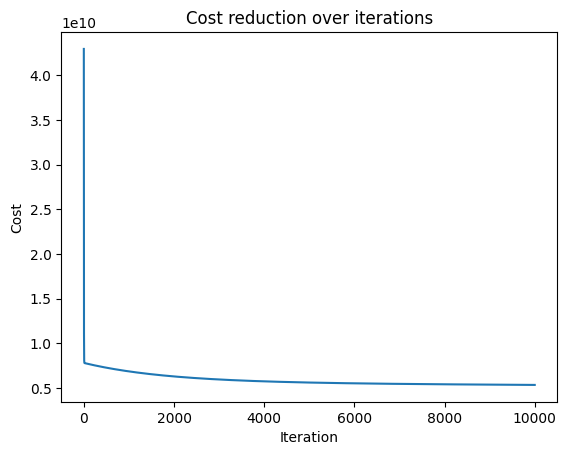

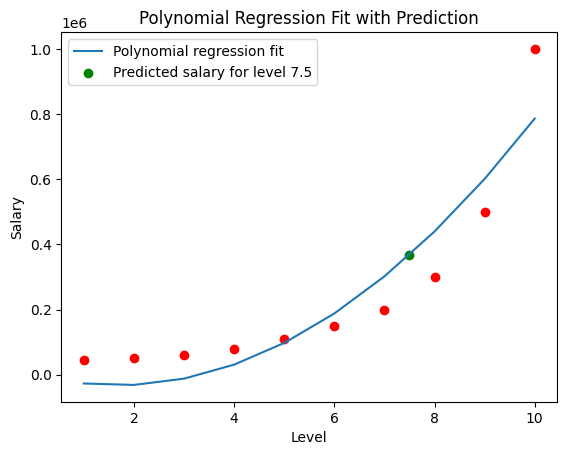

Predicted Salary for level 7.5: $367,915.23


In [18]:

# Polynomial Regression Model Function
def polynomial_regression(x, coefficients):
    """ Calculates y_pred = b + w1*x + w2*x^2 """
    y_pred = np.dot(x, coefficients)
    return y_pred

# Cost Function - Mean Squared Error
def compute_cost(X, y, coefficients):
    """ Computes the mean squared error cost """
    n = len(y)
    y_pred = polynomial_regression(X, coefficients)
    cost = (1/(2*n)) * np.sum((y_pred - y) ** 2)
    return cost

# Derivative of Cost Function
def derivatives(X, y, coefficients):
    """ Computes the derivatives of the MSE cost function """
    n = len(y)
    y_pred = polynomial_regression(X, coefficients)
    d_coefficients = (1/n) * np.dot(X.T, (y_pred - y))
    return d_coefficients

# Gradient Descent Function to Minimize the Cost Function
def gradient_descent(X, y, coefficients, learning_rate, iterations):
    """ Performs gradient descent to learn coefficients """
    cost_history = np.zeros(iterations)
    for i in range(iterations):
        coefficients -= learning_rate * derivatives(X, y, coefficients)
        cost_history[i] = compute_cost(X, y, coefficients)
    return coefficients, cost_history

# Load the dataset
data=pd.read_csv(r"/content/Position_Salaries.csv")
X = data['Level'].values.reshape(-1, 1)
y = data['Salary'].values

# Prepare polynomial features: x, x^2
X_poly = np.hstack((np.ones((X.shape[0], 1)), X, X**2))
# Initial coefficients (b, w1, w2)
coefficients = np.zeros(3)
learning_rate = 0.0001
iterations = 10000

# Run gradient descent
coefficients, cost_history = gradient_descent(X_poly, y, coefficients, learning_rate, iterations)

# Predicting using optimized coefficients
y_pred = polynomial_regression(X_poly, coefficients)
# Plot polynomial model
plt.scatter(X, y, color='red', label='Actual data')
plt.plot(X, y_pred, label='Polynomial regression fit')
plt.xlabel('Level')
plt.ylabel('Salary')
plt.title('Polynomial Regression Fit')
plt.legend()
plt.show()

# Plot iteration vs cost
plt.plot(range(iterations), cost_history)
plt.xlabel('Iteration')
plt.ylabel('Cost')
plt.title('Cost reduction over iterations')
plt.show()
# New level prediction
level_new = 7.5
new_X = np.array([1, level_new, level_new**2]).reshape(1, -1)
predicted_salary = polynomial_regression(new_X, coefficients)

# Plot with the new prediction
plt.scatter(X, y, color='red')
plt.plot(X, y_pred, label='Polynomial regression fit')
plt.scatter([level_new], [predicted_salary], color='green', label=f'Predicted salary for level {level_new}')
plt.xlabel('Level')
plt.ylabel('Salary')
plt.title('Polynomial Regression Fit with Prediction')
plt.legend()
plt.show()

print(f"Predicted Salary for level {level_new}: ${predicted_salary[0]:,.2f}")


### Answer the following

* What is learning rate?
> * Learning Rate controls the size of the steps taken during the optimization process
* What will happen if the learning rate is too large?
> * If learning rate is too large , the step size will be large and it may not converge to minima
* What will happen if the learning rate is too small?
> * If the learning time is too small , the training time will be too long.
* If you what to change the second order (quadratic) model to third order model what all things will change in the above code?
> * Add a term for the cubic power of x, changing from:
$$ y = w_1 x^2 + w_2 x + b $$
to:
$$ y = w_3 x^3 + w_1 x^2 + w_2 x + b $$

 Gradient Calculation for w_3:Introduce a new gradient calculation for w_3:$$
 \frac{\partial MSE}{\partial w_3} = -\frac{2}{n} \sum_{i=1}^{n} \left(y_i - (w_3 x_i^3 + w_1 x_i^2 + w_2 x_i + b)\right) x_i^3 $$

 Update Rule for w_3:
Update w_3 in each iteration:
 w_3 :$$w_3= w_3 - \alpha \frac{\partial MSE}{\partial w_3} $$

 Initialization:
Start with an initial value for w_3 similar to other parameters.